# Baseball Case Study


# Problem Statement:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import zscore
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


# Renaming & Calling the dataframe


In [2]:
df=pd.read_csv('BaseBall.csv')
df


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Extracting the dataset informations


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.2 KB


# Checking the data shape


In [4]:
df.shape


(30, 17)

# Obtaining the column names inolved in our dataset.


In [5]:
df.columns


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Checking the data-types under the respective columns.


In [6]:
df.dtypes


W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

# Checking the null values , if there's any


In [7]:
df.isnull()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Checking the tota no of values in each column


In [8]:
df.notnull().sum()


W      30
R      30
AB     30
H      30
2B     30
3B     30
HR     30
BB     30
SO     30
SB     30
RA     30
ER     30
ERA    30
CG     30
SHO    30
SV     30
E      30
dtype: int64

# Graph for the null values of dataset


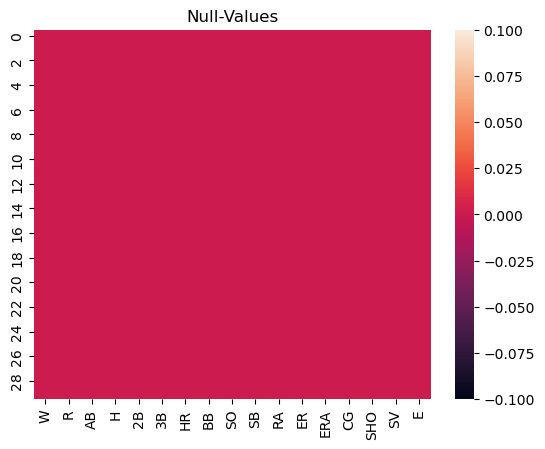

In [9]:
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()


In [10]:
df.loc[df['W']==" "]


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


In [11]:
df.isnull().sum()


W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Description of the dataframe


In [12]:
df.describe()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Graphical Representation of the dataframe


# Graph for the Target Variable - 'W'


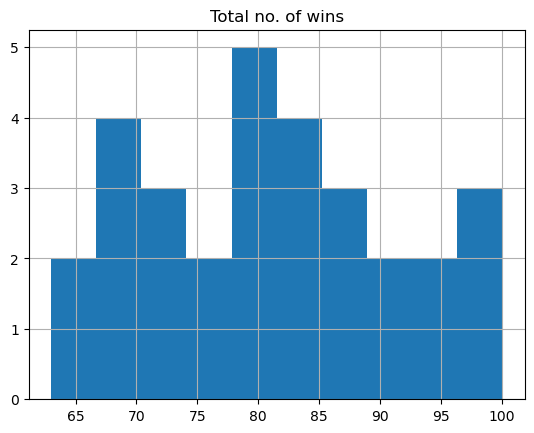

In [13]:
df['W'].hist(grid=True) # analysis on single attribute of the dataset
plt.title('Total no. of wins')
plt.show()


.We can conclude that our target variable is in continous form , so it's a linear regression problem.


# Graph for the dependent variables :-


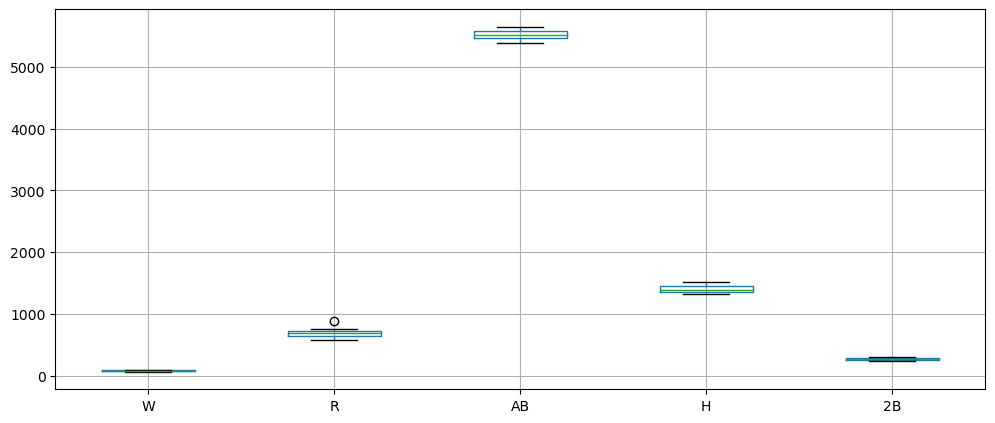

In [14]:
# plotting boxplots for first 5 columns
df.iloc[:,0:5].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()


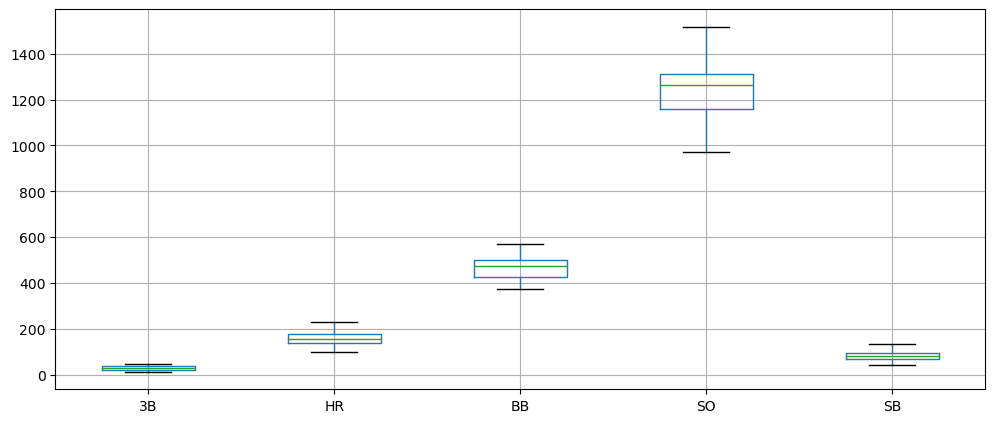

In [15]:
# plotting boxplots for first 5 columns
df.iloc[:,5:10].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()


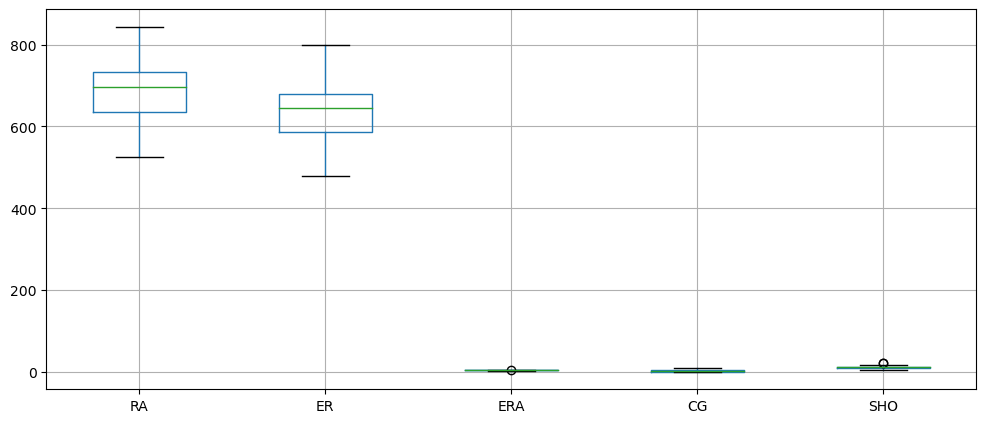

In [17]:
# plotting boxplots for first 5 columns
df.iloc[:,10:15].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()


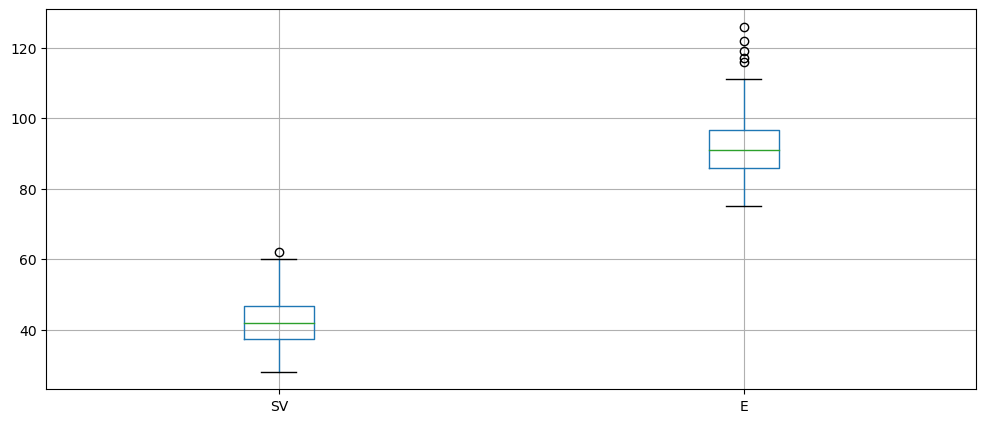

In [18]:
# plotting boxplots for first 5 columns
df.iloc[:,15:18].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()


# Visualisation of the data :


In [19]:
import seaborn as sns


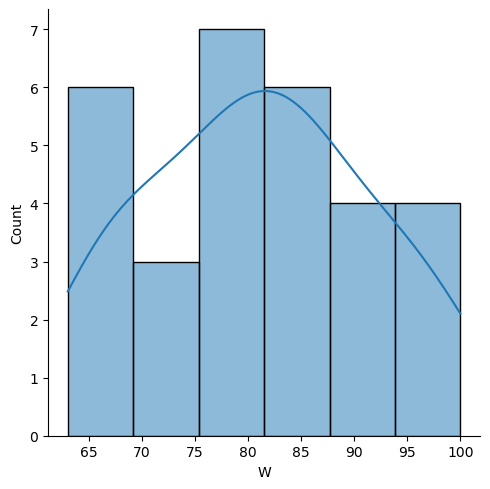

In [20]:
sns.displot(df['W'],kde=True)


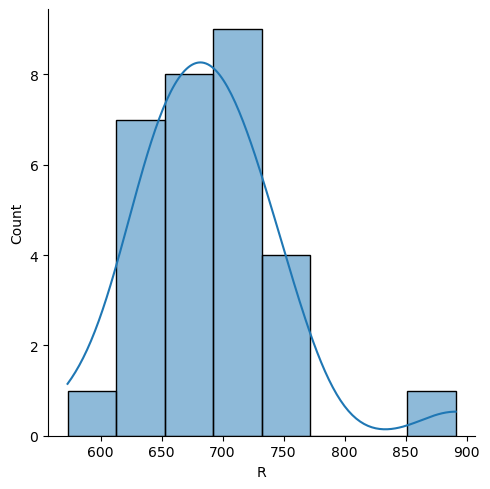

In [21]:
sns.displot(df['R'],kde=True)


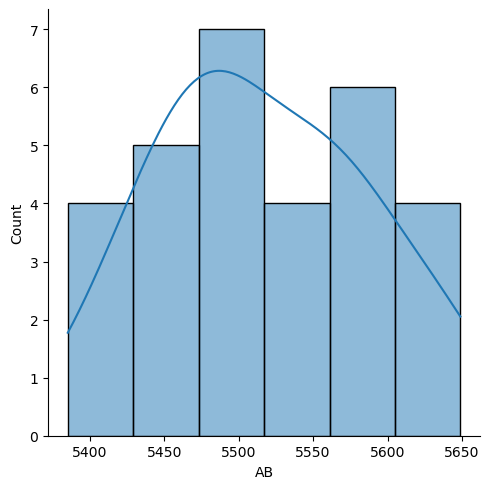

In [22]:
sns.displot(df['AB'],kde=True)


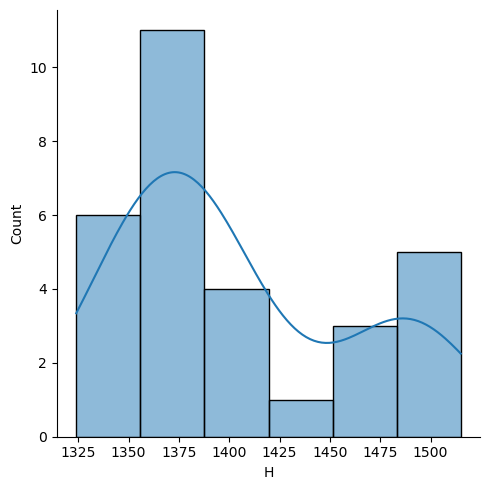

In [23]:
sns.displot(df['H'],kde=True)


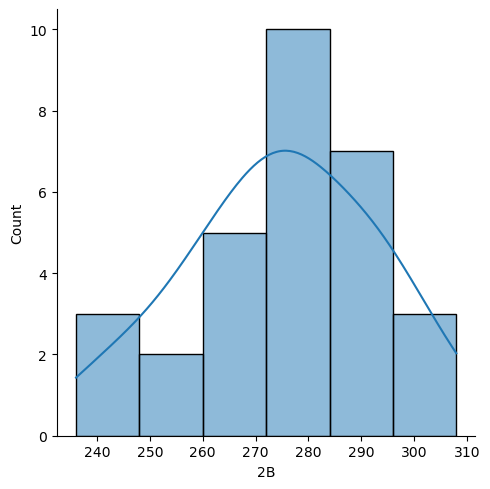

In [24]:
sns.displot(df['2B'],kde=True)


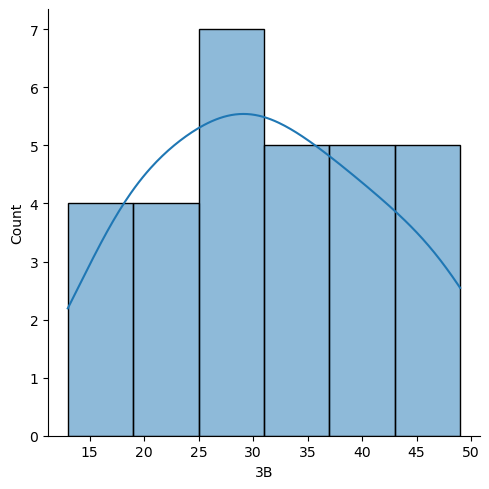

In [25]:
sns.displot(df['3B'],kde=True)


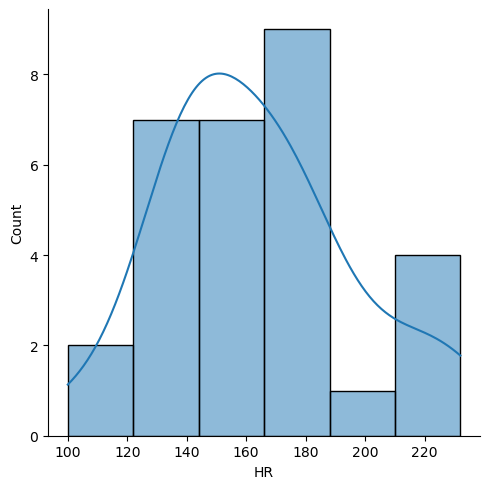

In [26]:
sns.displot(df['HR'],kde=True)


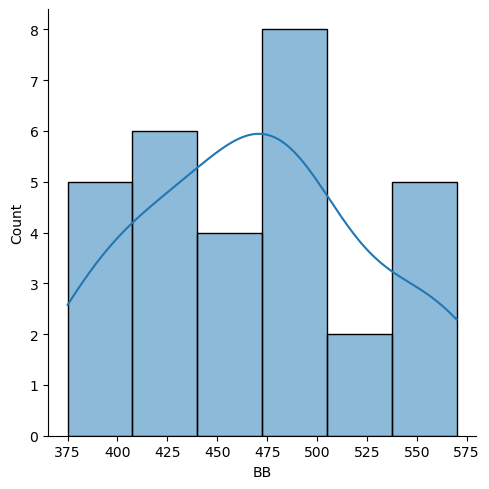

In [27]:
sns.displot(df['BB'],kde=True)


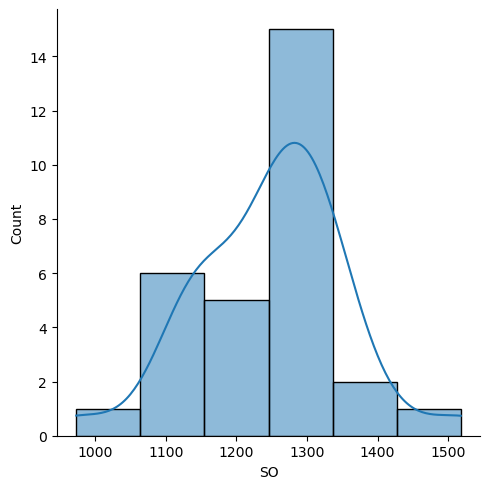

In [28]:
sns.displot(df['SO'],kde=True)


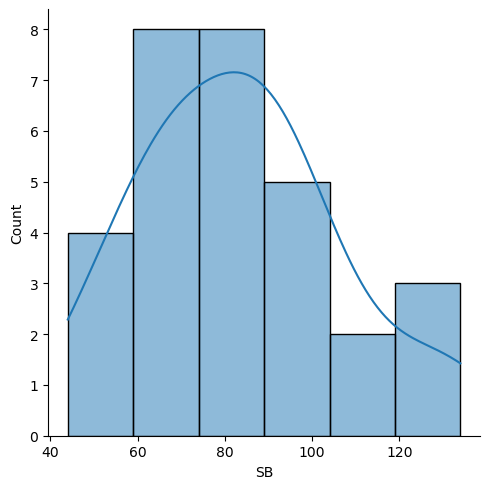

In [29]:
sns.displot(df['SB'],kde=True)


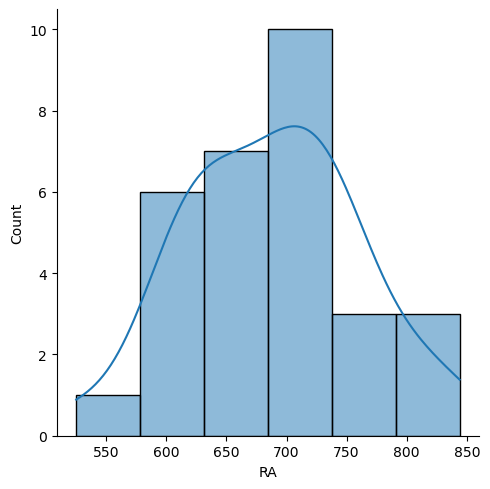

In [30]:
sns.displot(df['RA'],kde=True)


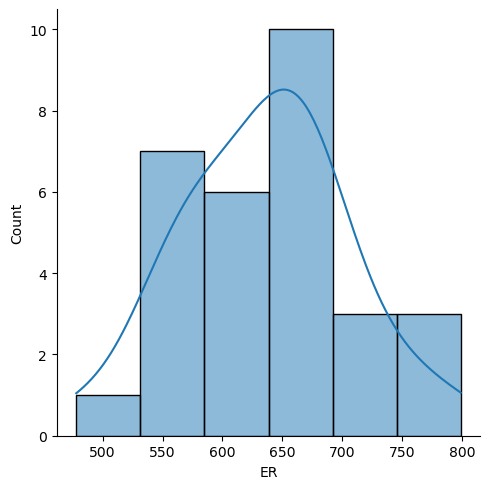

In [31]:
sns.displot(df['ER'],kde=True)


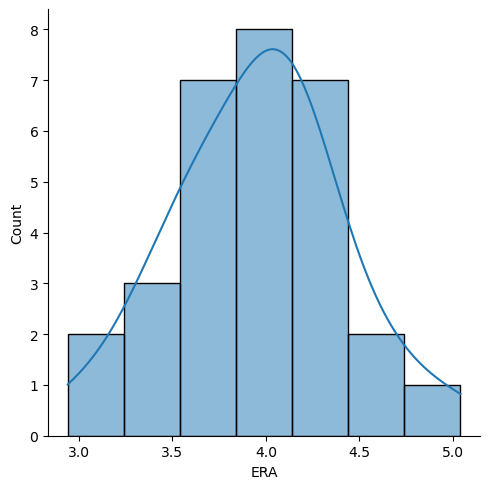

In [32]:
sns.displot(df['ERA'],kde=True)


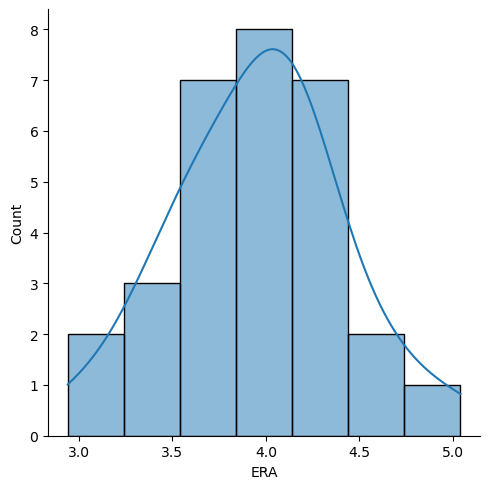

In [33]:
sns.displot(df['ERA'],kde=True)


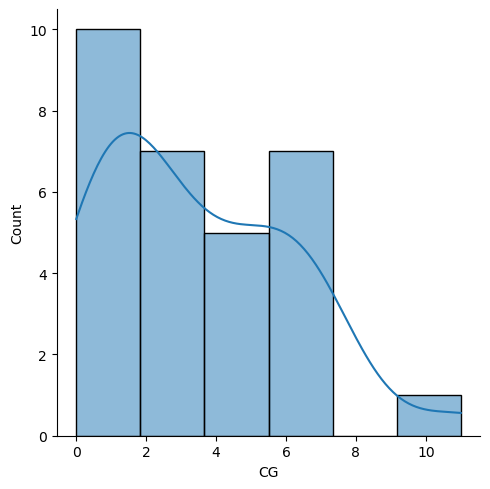

In [34]:
sns.displot(df['CG'],kde=True)


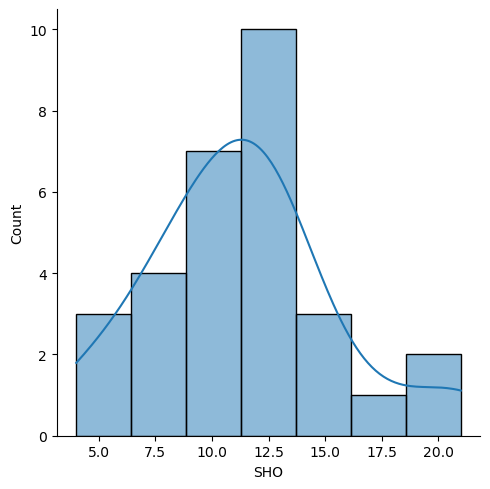

In [35]:
sns.displot(df['SHO'],kde=True)


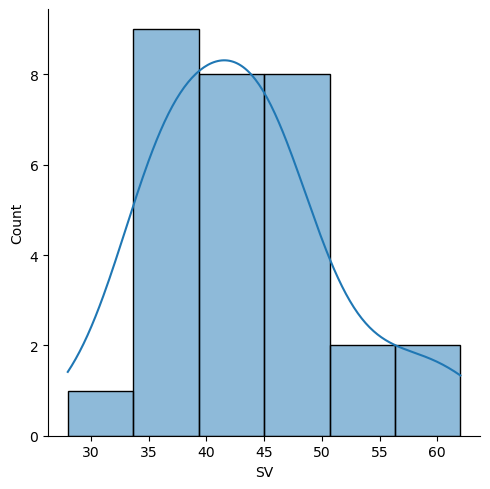

In [36]:
sns.displot(df['SV'],kde=True)


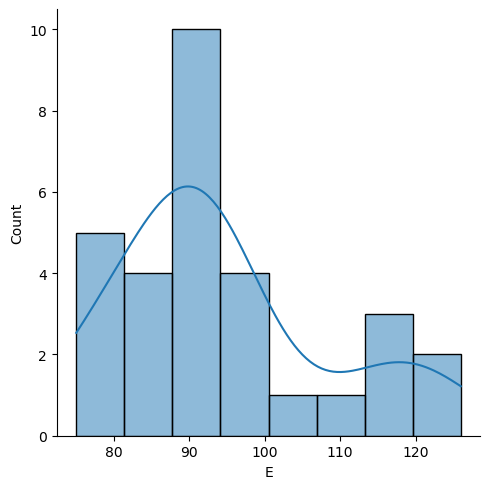

In [37]:
sns.displot(df['E'],kde=True)


# Description of the dataframe


In [38]:
df.describe()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<Axes: >

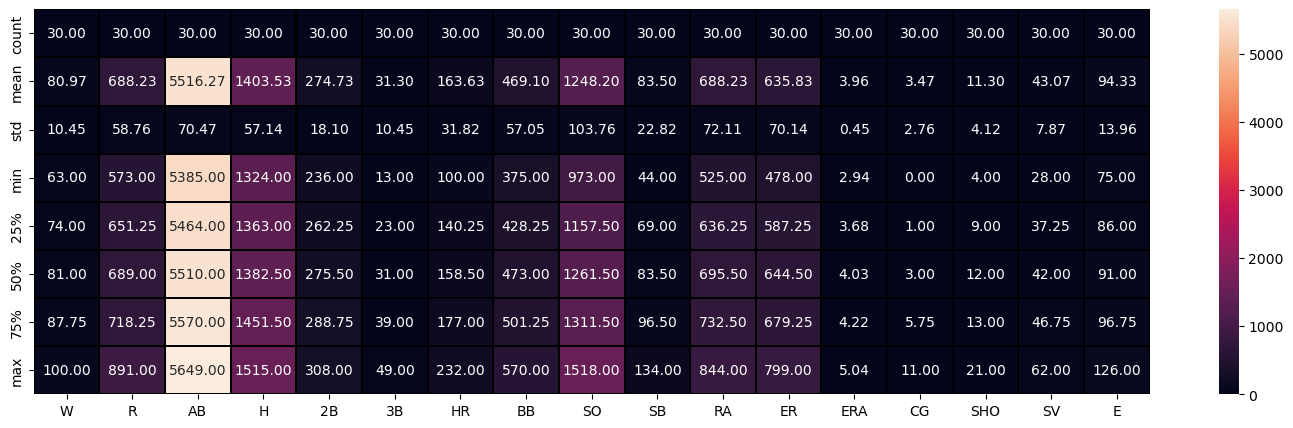

In [39]:
plt.figure(figsize=(18,5))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')


# Correlation of the columns with the target variables :-


In [40]:
df.corr()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<Axes: >

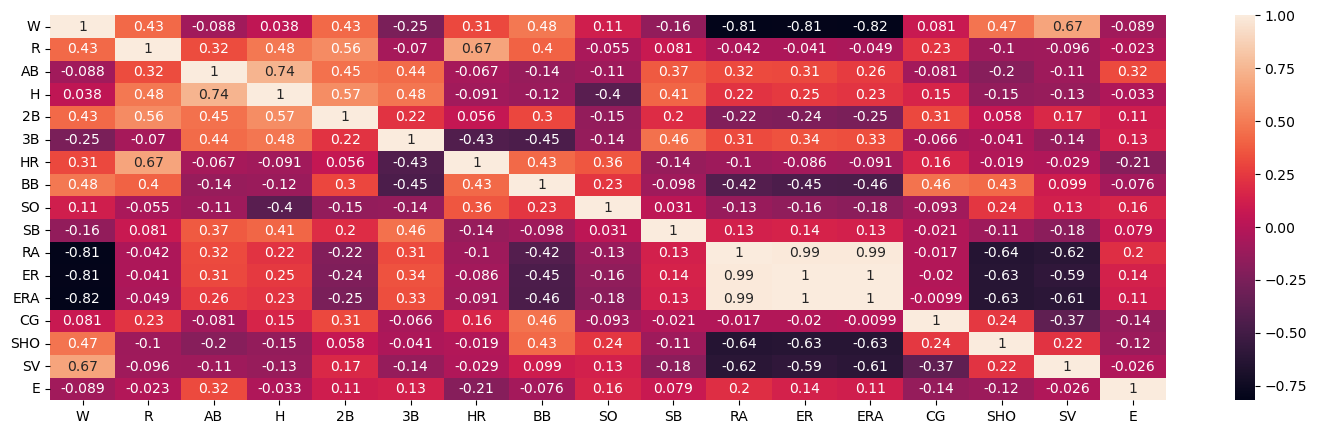

In [41]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(),annot=True)


# Checking the columns which are positivly or negatively related to target variable :-


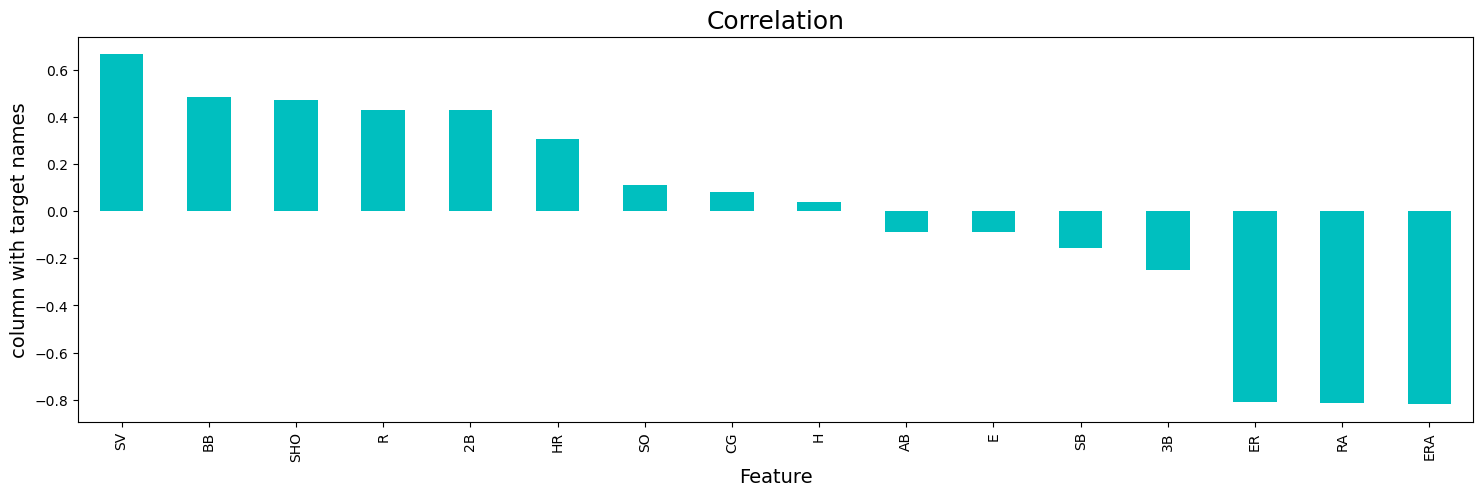

In [42]:
plt.figure(figsize=(18,5))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()


# Checking the skewness


In [43]:
df.skew()


W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [44]:
x=df.drop('W',axis=1)
y=df['W']


In [45]:
x.shape


(30, 16)

In [46]:
y.shape


(30,)

In [47]:
x.head()


,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [48]:
y.head()


0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

# Handling the skewness


In [49]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()


R     -0.055006
AB     0.090410
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
RA    -0.008082
ER    -0.001940
ERA    0.001746
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

In [50]:
df.dtypes


W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

# Encoding the Dataframe :


In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


In [52]:
le=preprocessing.LabelEncoder()
df['ERA']=le.fit_transform(df['ERA'])
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,9,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,18,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,7,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,13,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,27,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,11,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,15,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,17,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,10,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,24,3,10,40,97


# Box-plot graph for the variables :-


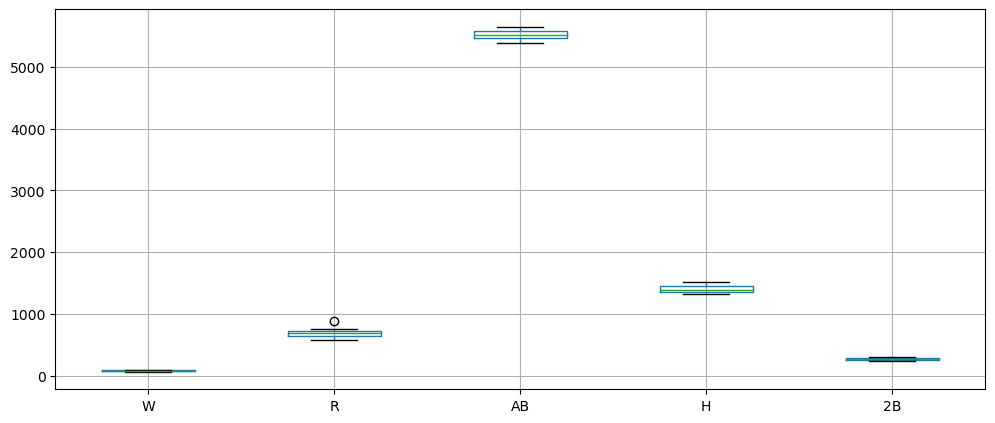

In [53]:
# plotting boxplots for first 5 columns
df.iloc[:,0:5].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()


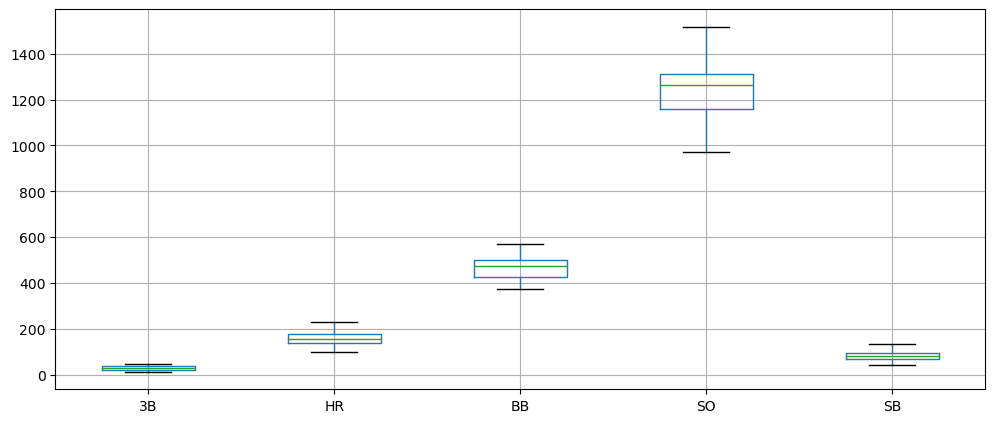

In [54]:
# plotting boxplots for next 5 columns
df.iloc[:,5:10].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()


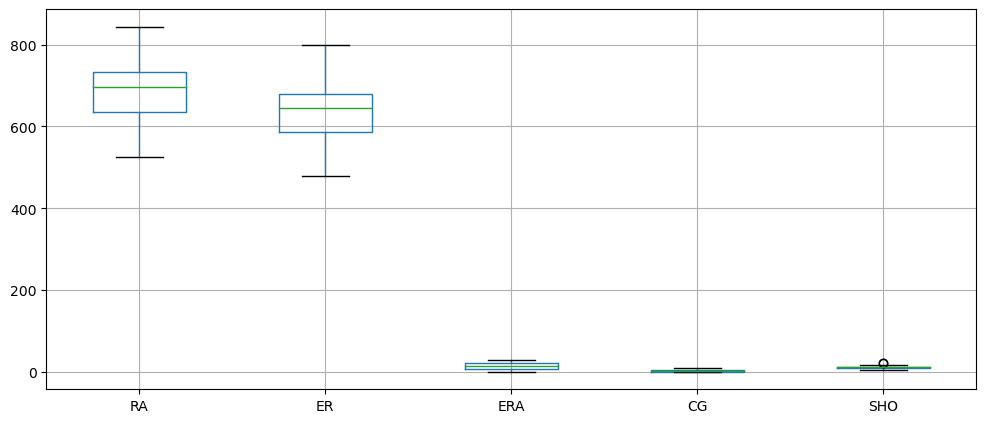

In [55]:
df.iloc[:,10:15].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()


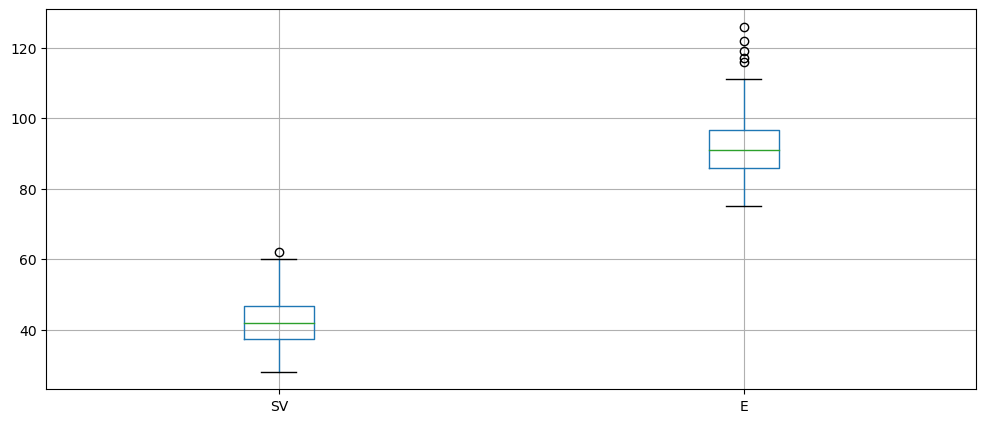

In [56]:
df.iloc[:,15:18].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()


# Handling the outliers :-


In [57]:
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
            #defining quartiles
            quartiles = percentile(df[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence


In [58]:
df 

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724.00,5575,1497,300,42,139,383,973,104,641,601,9,2,8,56,88.000
1,83,696.00,5467,1349,277,44,156,439,1264,70,700,653,18,2,12,45,86.000
2,81,669.00,5439,1395,303,29,141,533,1157,86,640,584,7,11,10,38,79.000
3,76,622.00,5533,1381,260,27,136,404,1231,68,701,643,13,7,9,37,101.000
4,74,689.00,5605,1515,289,49,151,455,1259,83,803,746,27,7,12,35,86.000
5,93,818.75,5509,1480,308,17,232,570,1151,88,670,609,11,7,10,34,88.000
6,87,764.00,5567,1397,272,19,212,554,1227,63,698,652,15,3,4,48,93.000
7,81,713.00,5485,1370,246,20,217,418,1331,44,693,646,17,0,10,43,77.000
8,80,644.00,5485,1383,278,32,167,436,1310,87,642,604,10,1,12,60,95.000
9,78,748.00,5640,1495,294,33,161,478,1148,71,753,694,24,3,10,40,97.000


In [59]:
df.shape # rows--> 30 , columns--> 17


(30, 17)

# Scaling the data with Min-Max Scaler


In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
mms=MinMaxScaler()
lr=LinearRegression()


In [61]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is :{r2_score(y_test,pred_test)} ')
    print('\n')        


At random state 0,the training accuracy is:0.9681348515901735
At random state 0,the testing accuracy is :0.3703799193209145 


At random state 1,the training accuracy is:0.9733856732704862
At random state 1,the testing accuracy is :0.33060984367410773 


At random state 2,the training accuracy is:0.9937308934727275
At random state 2,the testing accuracy is :-2.405551706592453 


At random state 3,the training accuracy is:0.9733765745975087
At random state 3,the testing accuracy is :0.5683741160453148 


At random state 4,the training accuracy is:0.9664066038869364
At random state 4,the testing accuracy is :0.28682960380033373 


At random state 5,the training accuracy is:0.9508521861901349
At random state 5,the testing accuracy is :0.7359925713179839 


At random state 6,the training accuracy is:0.9489496261745087
At random state 6,the testing accuracy is :0.8374394125305838 


At random state 7,the training accuracy is:0.9695004701946728
At random state 7,the testing accuracy is :0.04

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=24)


In [63]:
lr.fit(x_train,y_train)


LinearRegression()

In [64]:
pred_test=lr.predict(x_test)


In [65]:
print(r2_score(y_test,pred_test))


-2.2531326614546603


In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('error :')

print('Mean absolute error :',mean_absolute_error(y_test,pred_test))
print('Mean squared error :',mean_squared_error(y_test,pred_test))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('r2_score value :',r2_score(y_test,pred_test))


error :
Mean absolute error : 6.180070214896377
Mean squared error : 46.2077618851519
Root Mean Squared Error :  6.797629137070652
r2_score value : -2.2531326614546603


# Testing - Linear Regression with Lasso and Ridge models


In [67]:
from sklearn.linear_model import Lasso,Ridge


In [68]:
ls=Lasso(alpha=0.0001)
# ls=lasso(alpha=0.1) --> default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)


0.9924900318017592

In [69]:
Rg=Ridge(alpha=.001)
Rg.fit(x_train,y_train)
Rg.score(x_train,y_train)


0.9927777242140489

# Cross Validation Score for each model


In [70]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x,y,cv=5)
print('The cross validation score for the Linear Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.9520223175393904.')


The cross validation score for the Linear Regression model is : 0.04075540667465847
The difference between accuracy and crossvalidation score is :0.9520223175393904.


In [71]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(ls,x,y,cv=5)
print('The cross validation score for the Lasso Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.9794874854201138.')


The cross validation score for the Lasso Regression model is : 0.013002546381645486
The difference between accuracy and crossvalidation score is :0.9794874854201138.


In [72]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(Rg,x,y,cv=5)
print('The cross validation score for the Ridge Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.9612656956123247.')


The cross validation score for the Ridge Regression model is : 0.031512028601724175
The difference between accuracy and crossvalidation score is :0.9612656956123247.


# Saving the best model


In [73]:
import pickle

filename='pickledtcfile.pkl'
pickle.dump(lr,open('pickledtcfile','wb'))


In [74]:
saved_model=pickle.load(open('pickledtcfile','rb'))
saved_model.predict(x_test)


array([82.22266919, 79.34366312, 90.87161114, 90.19380794, 78.63383917,
       85.07056953, 89.67532563])